# Análise da composição e formação de preços dos aplicativos de carona.

Esta é uma análise simples sobre os preços de cada aplicativo de carona disponível.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from numpy import genfromtxt
from scipy.stats import zscore
from scipy import stats

In [2]:
sns.set(rc={'figure.figsize':(8,10)})
data_cars=pd.read_csv("cab_rides.csv")
data_cars.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


Para facilitar o processo, podemos então filtrar os objetos que nos interessam para a análise de dados.

In [3]:
items_filter=['price','distance','product_id','name','cab_type','surge_multiplier']
df=data_cars.filter(items_filter)
df.head()

,price,distance,product_id,name,cab_type,surge_multiplier
0,5.0,0.44,lyft_line,Shared,Lyft,1.0
1,11.0,0.44,lyft_premier,Lux,Lyft,1.0
2,7.0,0.44,lyft,Lyft,Lyft,1.0
3,26.0,0.44,lyft_luxsuv,Lux Black XL,Lyft,1.0
4,9.0,0.44,lyft_plus,Lyft XL,Lyft,1.0


In [4]:
df.describe()

,price,distance,surge_multiplier
count,637976.000000,693071.000000,693071.000000
mean,16.545125,2.189430,1.013870
std,9.324359,1.138937,0.091641
min,2.500000,0.020000,1.000000
25%,9.000000,1.280000,1.000000
50%,13.500000,2.160000,1.000000
75%,22.500000,2.920000,1.000000
max,97.500000,7.860000,3.000000


#  Limpeza e remoção de outliers

Primeiramente, para analisar os outliers, podemos plotar histogramas e analisar a distribuição dos dados.


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'surge_multiplier'}>,
        <AxesSubplot:>]], dtype=object)

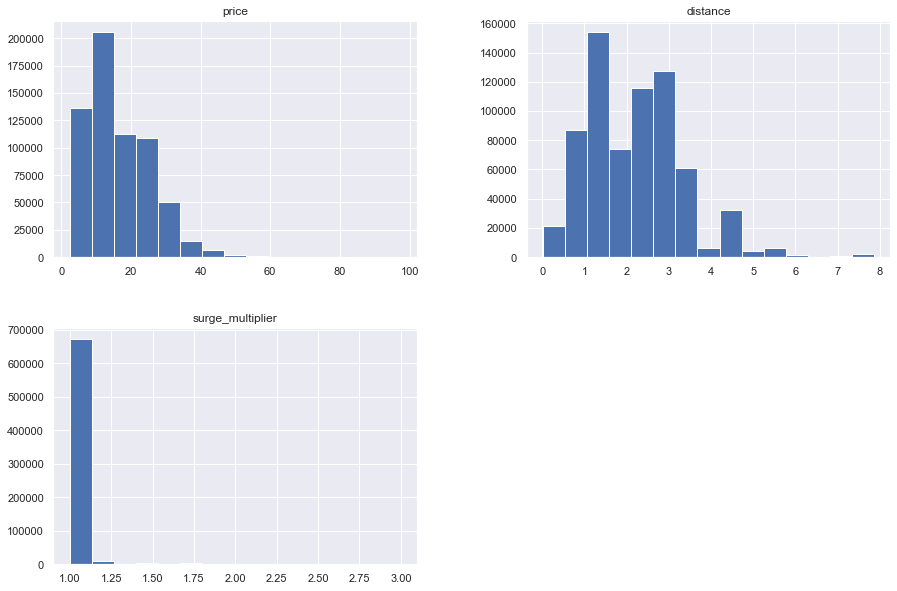

In [5]:
df.hist(bins=15, figsize=(15,10))

Podemos ver que a distribuição dos dados é um pouco concentrada, podemos então analisar de outra forma, através de um plot Box-plot:

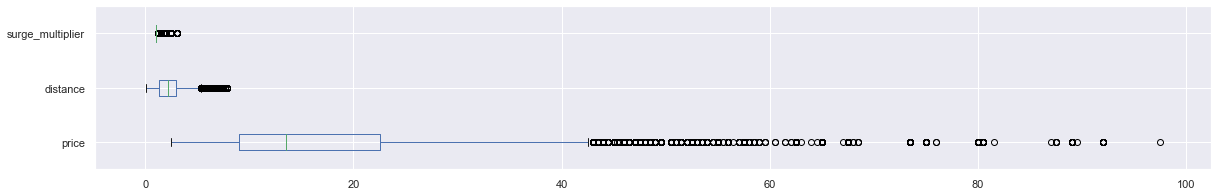

In [6]:
df.plot(kind='box', vert=False, figsize=(20, 3),)
plt.show()

Podemos então notar a presença de outliers, para resolver este problema, utilizamos o método Zscore, 
assumindo como outlier duas vezes o valor do z score

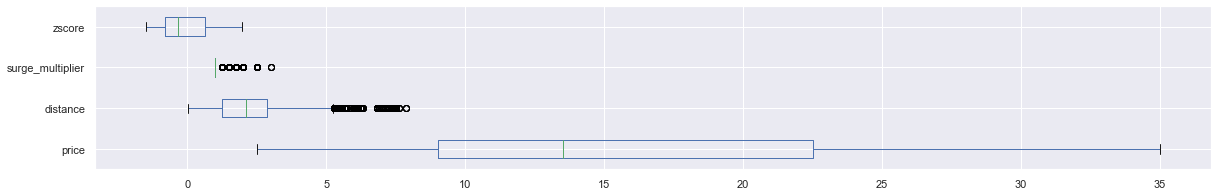

In [7]:
df['zscore']= (df['price']-16.545125490614065)/9.324358581419423
df_new = df[(df.zscore>-2) & (df.zscore<2)]
df_new.plot(kind='box', vert=False, figsize=(20, 3),)
plt.show()

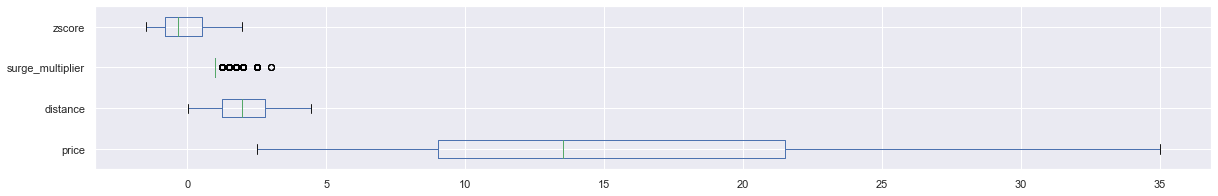

In [8]:
zscore = (df_new['distance']-2.189429755393147)/1.1389369868590802
df_new_2 = df_new[(zscore>-2) & (zscore<2)]

df_new_2.plot(kind='box', vert=False, figsize=(20, 3),)
plt.show()

Então, através removendo a maioria dos outliers e removendo as linhas que possuem valors faltando temos:

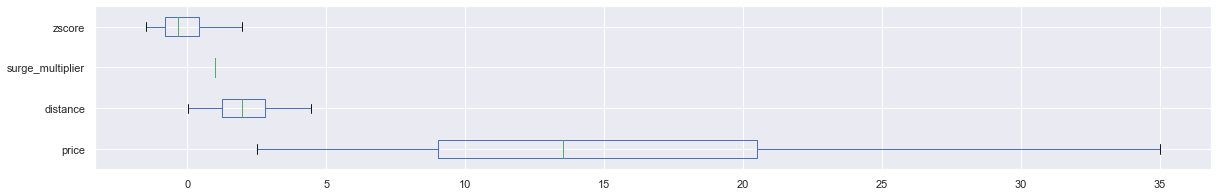

In [9]:
zscore = (df_new_2['surge_multiplier']-0.09164126209988058)/1.013870
df_new_3 = df_new_2[(zscore>-1) & (zscore<1)]
df_new_3.dropna()
df_new_3.plot(kind='box', vert=False, figsize=(20, 3),)
plt.show()

Notamos que os outliers foram removidos, se analisarmos as distribuições, podemos notar que as mesmas foram normalizadas.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'surge_multiplier'}>,
        <AxesSubplot:title={'center':'zscore'}>]], dtype=object)

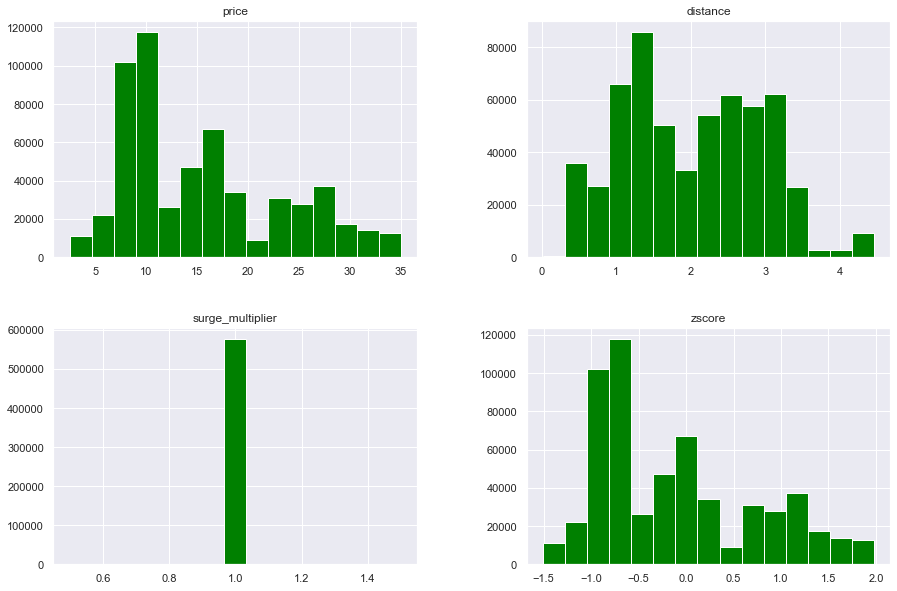

In [10]:
df_new_3.hist(bins=15, figsize=(15,10),color = "green")

# Análise de Preços.

Primeiramente, podemos então, começar analisando a relação entre preço e distância para cada uma das empresas.

Text(0.5, 1.0, 'Lyft')

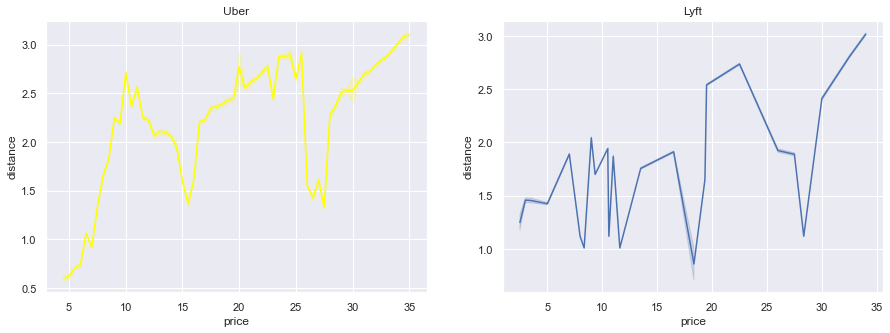

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_Uber = df_new_3.groupby(['cab_type']).get_group('Uber')
df_lyft = df_new_3.groupby(['cab_type']).get_group('Lyft')

sns.lineplot(ax=axes[0], x=df_Uber.price, y=df_Uber.distance, color= "yellow").set_title('Uber')

sns.lineplot(ax=axes[1], x=df_lyft.price, y=df_lyft.distance).set_title('Lyft')




<AxesSubplot:xlabel='cab_type', ylabel='price'>

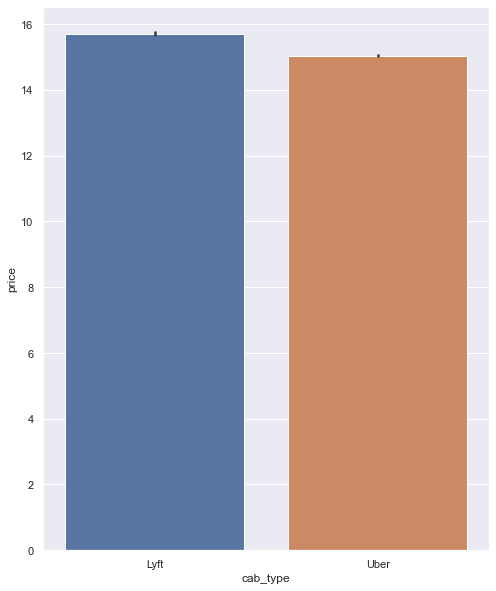

In [12]:

sns.barplot( x='cab_type',y='price',data=df_new_3 )


Text(0.5, 1.0, 'Uber')

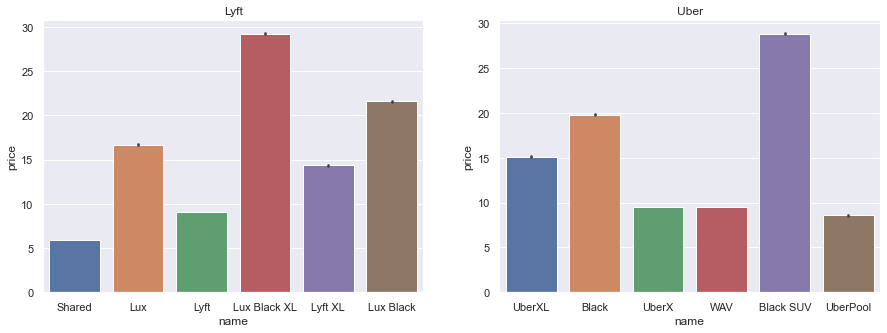

In [34]:
fig, axes = plt.subplots(1,2,figsize=(15, 5))



sns.barplot(ax=axes[0] ,x=df_lyft.name,y=df_lyft.price,data=df_lyft ).set_title('Lyft')
sns.barplot(ax=axes[1] ,x=df_Uber.name,y=df_Uber.price,data=df_Uber ).set_title('Uber')





Text(0.5, 1.0, 'corridas Uber')

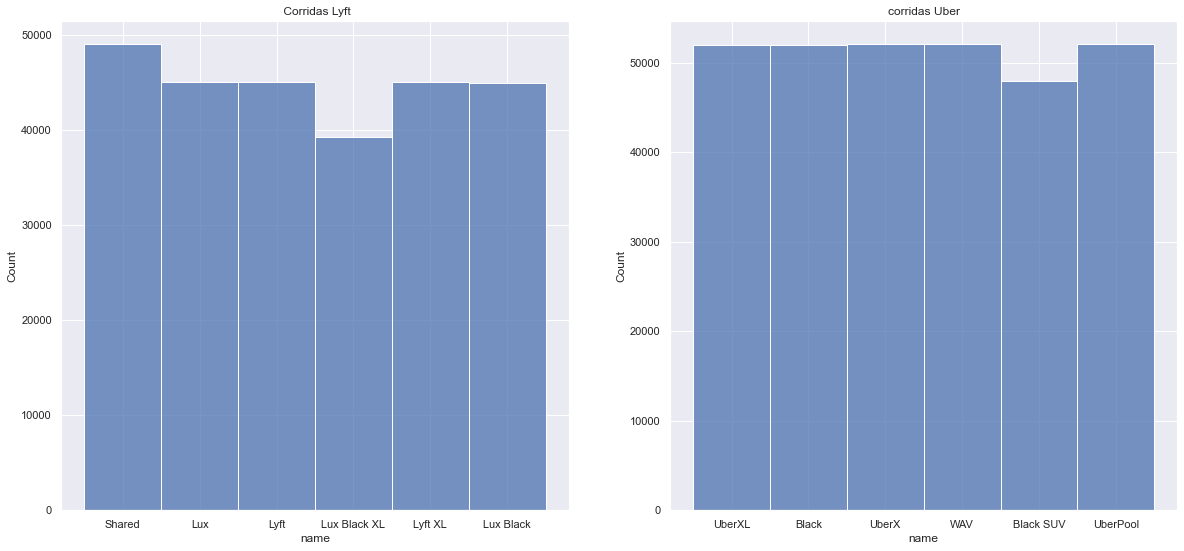

In [35]:
fig, axes = plt.subplots(1,2,figsize=(20, 9))


sns.histplot(ax=axes[0] ,x=df_lyft.name,data=df_lyft).set_title(' Corridas Lyft')
sns.histplot(ax=axes[1] ,x=df_Uber.name,data=df_Uber).set_title('corridas Uber')

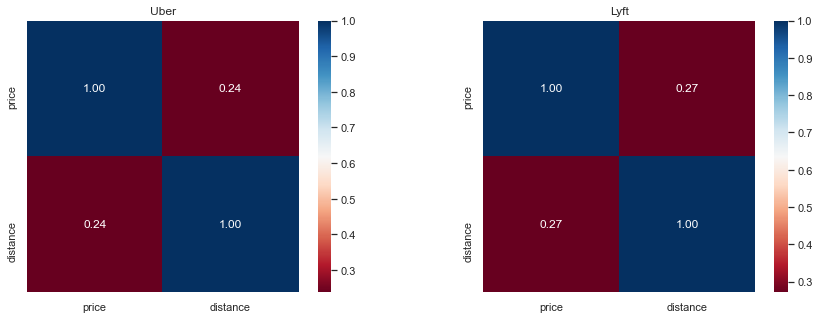

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

corr_uber = df_Uber[['price', 'distance']].corr()
corr_lyft = df_lyft[['price', 'distance']].corr()

sns.heatmap(corr_uber, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True,ax=axes[0]).set_title('Uber');
sns.heatmap(corr_lyft, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True,ax=axes[1]).set_title('Lyft');





# Conclusão

Uma análise preliminar mostra que a formação de preços, notamos que a distância influi mais no preço do serviço lyft que o serviço Uber.